# Import libraries 

In [1]:
# install geopandas and dependencies 
!pip install sidetable
!pip install pandas fiona shapely pyproj rtree
!pip install geopandas
!pip install --upgrade git+https://github.com/statsmodels/statsmodels

     |████████████████████████████████| 15.3MB 281kB/s 
     |████████████████████████████████| 6.6MB 51.2MB/s 
     |████████████████████████████████| 1.0MB 42.4MB/s 
     |████████████████████████████████| 1.0MB 13.9MB/s 
  Cloning https://github.com/statsmodels/statsmodels to /tmp/pip-req-build-joz4u2be
  Running command git clone -q https://github.com/statsmodels/statsmodels /tmp/pip-req-build-joz4u2be
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for statsmodels: filename=statsmodels-0.13.0.dev0+357.gc5abe558d-cp37-cp37m-linux_x86_64.whl size=17617804 sha256=34085f8c076fa25fdab726c5a89f179ae177b37868ceb5aa17aea3bcb8839a6e
  Stored in directory: /tmp/pip-ephem-wheel-cache-nc35texx/wheels/7d/ad/45/ac1a03bd759c2fa74c486e2b1950d94b55f511b4c2b0418bd5
Successfully built statsmodels
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninst

In [2]:
# General
import pandas as pd
import numpy as np

# Plotting
import matplotlib.pyplot as plt
from matplotlib import pyplot
from matplotlib.lines import Line2D 
from matplotlib.font_manager import FontProperties
import seaborn as sns
sns.set_style('white', {'legend.frameon':False})
import geopandas as gpd
%matplotlib inline

# Webscraping
from dateutil import rrule
from datetime import datetime, timedelta, date
from locale import atof, setlocale, LC_NUMERIC

# Sklearn
import sklearn
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans


# Statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#from statsmodels.tsa.ar_model import AutoReg
import statistics as stats
from statsmodels.tools.eval_measures import rmse
import statsmodels.api as sm
import itertools
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
#from statsmodels.tsa.arima_model import ARIMA, ARMA
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

#Network analysis
import math
import json
import networkx as nx
from IPython.display import Image


# plotstyle
plt.style.use('ggplot')

In [ ]:
#!pip freeze

# Import Data

In [3]:
# import data 
df = pd.read_csv('Final_Data_Merge_ESG.csv') 

In [4]:
# some preprocessing
# remove unnamed columns
df = df.loc[:, ~df.columns.str.contains('^Unnamed')] # Drop unnamed columns

# change object data types to numeric
df['COUPON RATE'] = pd.to_numeric(df['COUPON RATE'], errors = 'coerce')

# make date datetime object
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# make maturity date datetime object
df['MATURITY DATE'] = pd.to_datetime(df['MATURITY DATE'])

# extract year in separate column
df['Year'] = df['Date'].dt.strftime('%Y')

# extract month in separate column
df['Month'] = df['Date'].dt.strftime('%m')

In [5]:
df.head(10)

,NCB,Date,ISIN,ISSUER,MATURITY DATE,COUPON RATE,MONTH_YEAR,MONTHS,HOLDINGS,COUNT,EURO HOLDING,Input_Country,gind,gsector,gsubind,SIC,spcindcd,spcseccd,Compustat,Country,Climate Watch,International Energy Agency,GHG_Total_CW,GHG_IEA_Share,Emissions,Resource Use,Innovation,Total Environment,Year,Month
0,IT,2017-06-23,XS0859920406,A2A S.p.A.,2019-11-28,4.500,2017-06,2017-06-30,6.79,1934,0.003511,IT,551030.0,55.0,55103010.0,4911.0,705.0,700.0,1.0,Italy,Electricity/Heat,Oil & Natural Gas,1108.45,3.9,95.0,91.0,91.0,93.0,2017,06
1,IT,2017-06-23,XS0951567030,A2A S.p.A.,2021-10-01,4.375,2017-06,2017-06-30,6.79,1934,0.003511,IT,551030.0,55.0,55103010.0,4911.0,705.0,700.0,1.0,Italy,Electricity/Heat,Oil & Natural Gas,1108.45,3.9,95.0,91.0,91.0,93.0,2017,06
2,IT,2017-06-23,XS1004874621,A2A S.p.A.,2022-01-13,3.625,2017-06,2017-06-30,6.79,1934,0.003511,IT,551030.0,55.0,55103010.0,4911.0,705.0,700.0,1.0,Italy,Electricity/Heat,Oil & Natural Gas,1108.45,3.9,95.0,91.0,91.0,93.0,2017,06
3,IT,2017-06-23,XS1195347478,A2A S.p.A.,2025-02-25,1.750,2017-06,2017-06-30,6.79,1934,0.003511,IT,551030.0,55.0,55103010.0,4911.0,705.0,700.0,1.0,Italy,Electricity/Heat,Oil & Natural Gas,1108.45,3.9,95.0,91.0,91.0,93.0,2017,06
4,IT,2017-06-23,XS1581375182,A2A S.p.A.,2024-03-16,1.250,2017-06,2017-06-30,6.79,1934,0.003511,IT,551030.0,55.0,55103010.0,4911.0,705.0,700.0,1.0,Italy,Electricity/Heat,Oil & Natural Gas,1108.45,3.9,95.0,91.0,91.0,93.0,2017,06
5,IT,2017-06-30,XS0859920406,A2A S.p.A.,2019-11-28,4.500,2017-06,2017-06-30,6.79,1934,0.003511,IT,551030.0,55.0,55103010.0,4911.0,705.0,700.0,1.0,Italy,Electricity/Heat,Oil & Natural Gas,1108.45,3.9,95.0,91.0,91.0,93.0,2017,06
6,IT,2017-06-30,XS0951567030,A2A S.p.A.,2021-10-01,4.375,2017-06,2017-06-30,6.79,1934,0.003511,IT,551030.0,55.0,55103010.0,4911.0,705.0,700.0,1.0,Italy,Electricity/Heat,Oil & Natural Gas,1108.45,3.9,95.0,91.0,91.0,93.0,2017,06
7,IT,2017-06-30,XS1004874621,A2A S.p.A.,2022-01-13,3.625,2017-06,2017-06-30,6.79,1934,0.003511,IT,551030.0,55.0,55103010.0,4911.0,705.0,700.0,1.0,Italy,Electricity/Heat,Oil & Natural Gas,1108.45,3.9,95.0,91.0,91.0,93.0,2017,06
8,IT,2017-06-30,XS1195347478,A2A S.p.A.,2025-02-25,1.750,2017-06,2017-06-30,6.79,1934,0.003511,IT,551030.0,55.0,55103010.0,4911.0,705.0,700.0,1.0,Italy,Electricity/Heat,Oil & Natural Gas,1108.45,3.9,95.0,91.0,91.0,93.0,2017,06
9,IT,2017-06-30,XS1581375182,A2A S.p.A.,2024-03-16,1.250,2017-06,2017-06-30,6.79,1934,0.003511,IT,551030.0,55.0,55103010.0,4911.0,705.0,700.0,1.0,Italy,Electricity/Heat,Oil & Natural Gas,1108.45,3.9,95.0,91.0,91.0,93.0,2017,06


# Exploratory Analysis

First some information about the national central banks that purchase the bonds:

In [ ]:
df['NCB'].unique()

array(['IT', 'DE', 'FI', 'FR', 'ES', 'BE'], dtype=object)

There are five different countries purchasing bonds: Italy, Germany, Finland, France, Spain and Belgium

Now a look at the countries at which the headquarters of the bond issuers are registered:

In [ ]:
df['Country'].unique()

array(['Italy', 'Germany', 'Austria', 'France', 'Spain', 'Netherlands',
       'Finland', 'Portugal', 'Belgium', 'Estonia', 'Ireland', 'Slovakia',
       'Latvia', 'Czech', 'Switzerland', 'Luxembourg', 'Sweden',
       'Denmark', 'Germany ', 'United Kingdom'], dtype=object)

These are more diverse. Bonds from 20 countries are puchased, so not from all European countries. Furthermore some are purchsed from companies in Switzerland and the UK which are not part of the EU. 

The number of unique bond issuers:

In [ ]:
df['ISSUER'].nunique()

259

This is the number of bond issuing companies for which information about the ESG company scores is available. In total bonds are purchased from around 450 bond issuing companies. Some of those are duplicate observations due to minute changes of the name as recorded by the ECB across publishing periods. A substantive amount of companies consists of corporate entities specialized in issuing bonds for other companies, that do not posses own ESG ratings and can not be meaningfully associated with one of the sectors as classified by Climate Watch and International Energy Agency. Hence we focus on the core companies clearly belonging to the sector breakdowns and possessing an ESG rating. 

# Coupon Rate Analysis

## Country

In [ ]:
# average coupon rate by purchasing NCB
mean_coupon_rate = pd.DataFrame(df.groupby("Input_Country")['COUPON RATE'].mean())
mean_coupon_rate.columns = ['Average Coupon Rate']
mean_coupon_rate

,Average Coupon Rate
Input_Country,
BE,1.898308
DE,1.545951
ES,2.158823
FI,2.285982
FR,1.829745
IT,2.595878


In [ ]:
# average coupon rate by purchasing NCB
mean_coupon_rate = pd.DataFrame(df.groupby("Country")['COUPON RATE'].mean())
mean_coupon_rate.columns = ['Average Coupon Rate']
mean_coupon_rate

,Average Coupon Rate
Country,
Austria,3.200658
Belgium,2.371597
Czech,1.000000
Denmark,1.375000
Estonia,1.891010
Finland,2.191628
France,1.828535
Germany,1.507818
Germany,1.733214


The average coupon rate is highest for the coupons bought by the Italian central bank and for companies from Austria. 

In [7]:
# group the data by ISIN
issues = pd.DataFrame(df.groupby('ISIN').first()).reset_index()
issues.head()

,ISIN,NCB,Date,ISSUER,MATURITY DATE,COUPON RATE,MONTH_YEAR,MONTHS,HOLDINGS,COUNT,EURO HOLDING,Input_Country,gind,gsector,gsubind,SIC,spcindcd,spcseccd,Compustat,Country,Climate Watch,International Energy Agency,GHG_Total_CW,GHG_IEA_Share,Emissions,Resource Use,Innovation,Total Environment,Year,Month
0,AT0000A0X913,FI,2017-06-23,KELAG-Kärntner Elektrizitäts- Aktiengesellschaft,2022-10-24,3.250,2017-06,2017-06-30,6.790,1934,0.003511,FI,NaN,NaN,NaN,4910.0,NaN,NaN,0.0,Austria,Electricity/Heat,Oil & Natural Gas,1108.45,3.9,NaN,NaN,NaN,NaN,2017,06
1,AT0000A24UY3,FI,2018-12-14,Borealis AG,2025-10-12,1.750,2018-12,2018-12-31,1.172,4845,0.000242,FI,151010.0,15.0,15101010.0,2821.0,167.0,970.0,1.0,Austria,Industrial Processes,Other industry,166.07,10.6,NaN,NaN,NaN,NaN,2018,12
2,BE0002178441,BE,2017-06-23,DELHAIZE GROUP,2018-10-19,4.250,2017-06,2017-06-30,6.790,1934,0.003511,BE,301010.0,30.0,30101030.0,5411.0,440.0,978.0,1.0,Belgium,Waste,Food and tobacco,108.70,1.0,52.0,38.0,26.0,42.0,2017,06
3,BE0002189554,BE,2017-06-23,Delhaize Group S.A.,2020-02-27,3.125,2017-06,2017-06-30,6.790,1934,0.003511,BE,301010.0,30.0,30101030.0,5411.0,440.0,978.0,1.0,Belgium,Waste,Food and tobacco,108.70,1.0,52.0,38.0,26.0,42.0,2017,06
4,BE0002239086,BE,2017-06-23,ELIA SYSTEM OPERATOR N.V.,2024-05-27,1.375,2017-06,2017-06-30,6.790,1934,0.003511,BE,NaN,NaN,NaN,4931.0,NaN,NaN,0.0,Belgium,Electricity/Heat,Oil & Natural Gas,1108.45,3.9,70.0,68.0,0.0,49.0,2017,06


In [ ]:
# function to display coupon rates 

def coupon_rate(country):
    # linegraph
    input_country_coupon = issues.pivot(columns = country,
                         values='COUPON RATE')
    fig1 = input_country_coupon.plot.density(figsize = (7, 7),
                           linewidth = 4)
    fig1 = plt.xlabel('Coupon Rate')
    return fig1
    
    
def coupon_rate_boxplots(input_col, plot_title, axis_title):
    # boxplot
    input_country_coupon = issues.pivot(columns = input_col,
                         values='COUPON RATE')
    fig2, ax = plt.subplots(figsize = (18, 7))
    fig2 = sns.boxplot(ax = ax,data=input_country_coupon).set_title(plot_title)
    fig2 = plt.xlabel(axis_title)
    fig2 = plt.ylabel('Coupon Rate')
    plt.xticks(rotation=35)
    fig2 = plt.show()
    return fig2

Text(0.5, 0, 'Coupon Rate')

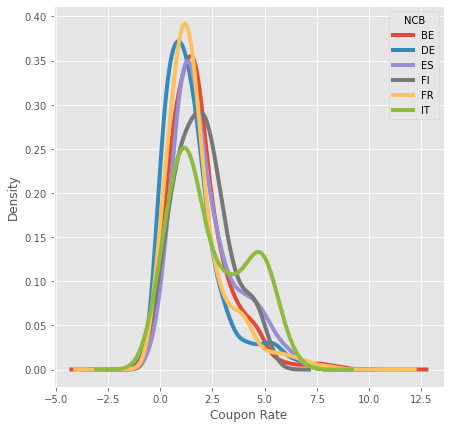

In [ ]:
coupon_rate('NCB')

The highest density of coupon rates is univocally observed for values close to 1. Italy has a distinct, but lower second peak just below 5. 

**Boxplots of Coupon Rate Distributions across issuing and purchasing countries**

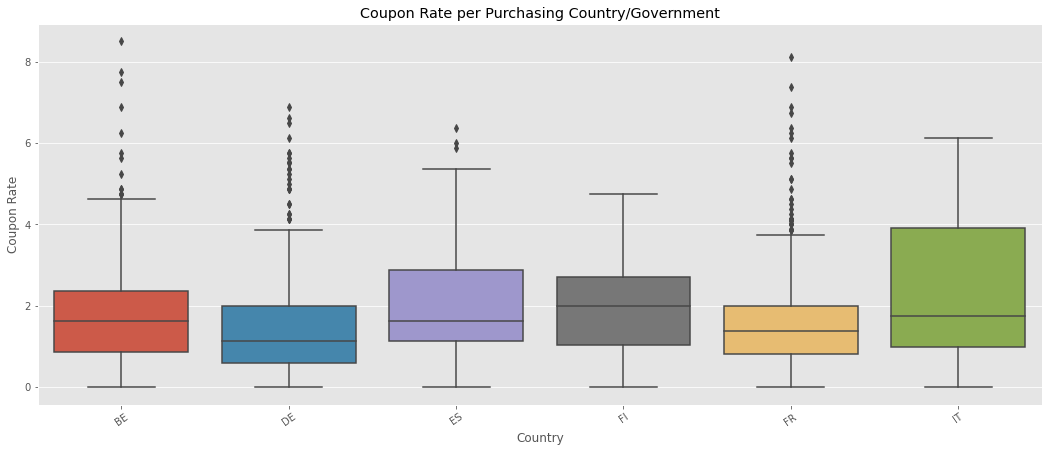

In [ ]:
coupon_rate_boxplots('NCB', 'Coupon Rate per Purchasing Country/Government','Country')

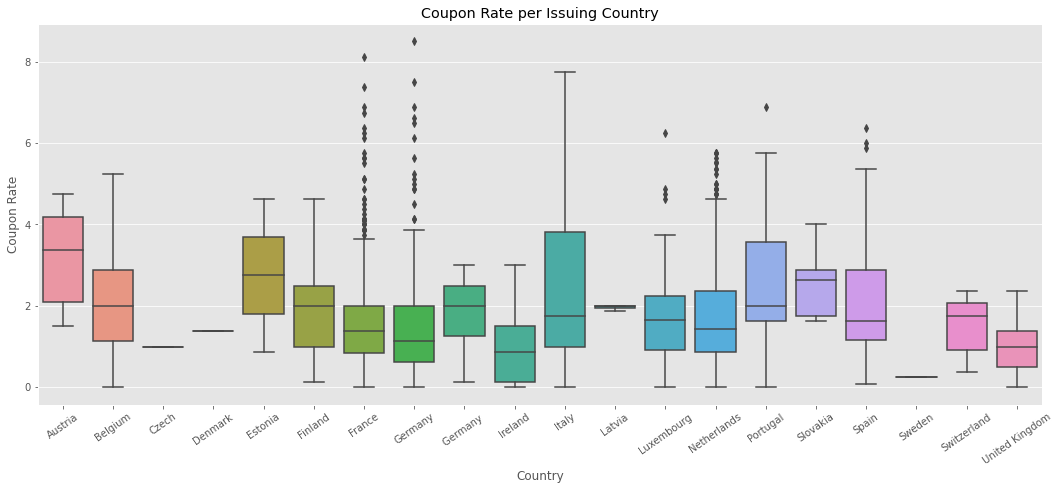

In [ ]:
coupon_rate_boxplots('Country', 'Coupon Rate per Issuing Country','Country')

The distribution of coupon rates across purchasing countries displays much less variability than across the issuing countries. This is due to the puchases of bonds from different countries being spread across the national central banks, decreasing cross-country heterogeneity with regard to the puchasing entities. 

## International Energy Agency Sector

In [ ]:
coupon_rate_boxplots('International Energy Agency', 'Coupon Rate per International Energy Agency','Sector')

NameError: ignored

There is some variability for the coupon rate distribution across companies that belong to different sectors. This is partially because the distribution of companies across sectors is not uniform, but also due to within sector variability of coupon rates. On average highest coupon rates are achieved by firms in the Non-ferous metal and Livestock & Manure Sector. The lowest for unallocated fuel combustion, Other Industry, Residential and Chemical & Petrochemical (Energy). 

## SIC Codes (Industry Classification)

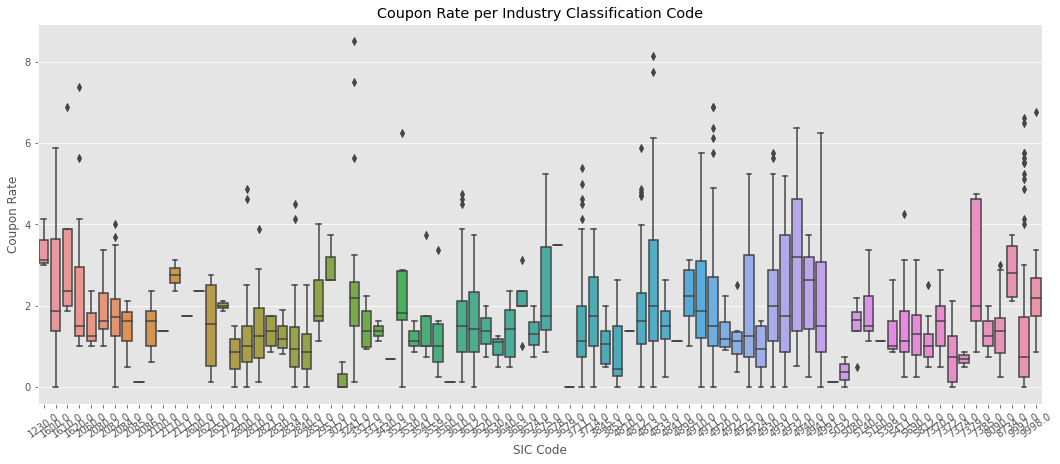

In [ ]:
coupon_rate_boxplots('SIC', 'Coupon Rate per Industry Classification Code','SIC Code')

## Year

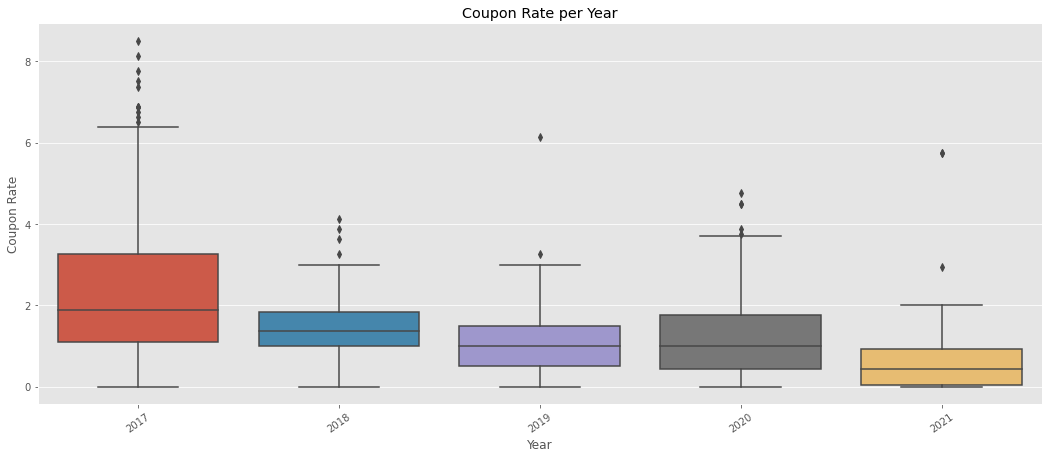

In [ ]:
coupon_rate_boxplots('Year', 'Coupon Rate per Year','Year')

The average coupon rate of purchased bonds has steadiliy decreased. 

## An exemplary company

In [ ]:
asa = df.loc[df['ISSUER'] == 'A2A S.p.A.']
asa.head()

,NCB,Date,ISIN,ISSUER,MATURITY DATE,COUPON RATE,MONTH_YEAR,MONTHS,HOLDINGS,COUNT,...,Climate Watch,International Energy Agency,GHG_Total_CW,GHG_IEA_Share,Emissions,Resource Use,Innovation,Total Environment,Year,Month
0,IT,2017-06-23,XS0859920406,A2A S.p.A.,2019-11-28,4.500,2017-06,2017-06-30,6.79,1934,...,Electricity/Heat,Oil & Natural Gas,1108.45,3.9,95.0,91.0,91.0,93.0,2017,06
1,IT,2017-06-23,XS0951567030,A2A S.p.A.,2021-10-01,4.375,2017-06,2017-06-30,6.79,1934,...,Electricity/Heat,Oil & Natural Gas,1108.45,3.9,95.0,91.0,91.0,93.0,2017,06
2,IT,2017-06-23,XS1004874621,A2A S.p.A.,2022-01-13,3.625,2017-06,2017-06-30,6.79,1934,...,Electricity/Heat,Oil & Natural Gas,1108.45,3.9,95.0,91.0,91.0,93.0,2017,06
3,IT,2017-06-23,XS1195347478,A2A S.p.A.,2025-02-25,1.750,2017-06,2017-06-30,6.79,1934,...,Electricity/Heat,Oil & Natural Gas,1108.45,3.9,95.0,91.0,91.0,93.0,2017,06
4,IT,2017-06-23,XS1581375182,A2A S.p.A.,2024-03-16,1.250,2017-06,2017-06-30,6.79,1934,...,Electricity/Heat,Oil & Natural Gas,1108.45,3.9,95.0,91.0,91.0,93.0,2017,06


In [ ]:
asa['ISIN'].nunique()

8

In [ ]:
# function to plot holdings
def holdings(cols, vals, xaxis):
    # converting data into wide-format
    asa_holdings = asa.pivot(columns=cols,
                     values=vals)

    # holdings for each bond
    fig = asa_holdings.plot.density(figsize = (7, 7),
                       linewidth = 4)
  
    fig = plt.xlabel(xaxis)
    return fig

Text(0.5, 0, 'Holdings')

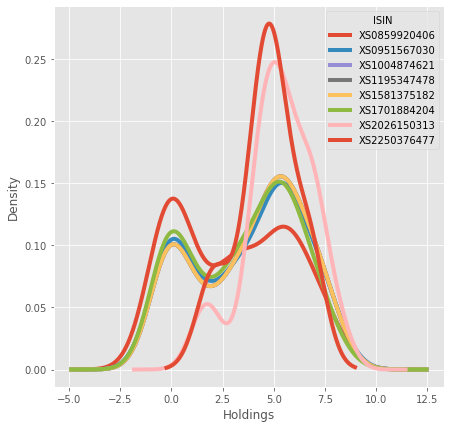

In [ ]:
holdings('ISIN', 'HOLDINGS', 'Holdings')

Text(0.5, 0, 'Count')

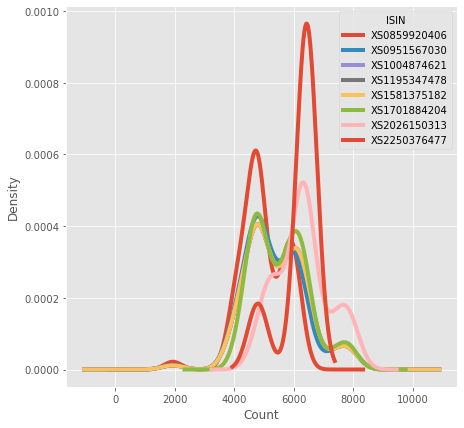

In [ ]:
holdings('ISIN', 'COUNT', 'Count')

In [ ]:
# sort by coupon rate
coupon_asa = asa.groupby('ISIN')['COUPON RATE']
coupon_asa.first()

ISIN
XS0859920406    4.500
XS0951567030    4.375
XS1004874621    3.625
XS1195347478    1.750
XS1581375182    1.250
XS1701884204    1.625
XS2026150313    1.000
XS2250376477    0.625
Name: COUPON RATE, dtype: float64

Here we take an exemplary look at the puchases of bonds issued by one companies over the years. Due to the strong assumptions that have to be made regarding an equal purchase volume of bonds puchased within one month patterns are expectably somewhat similar for all firms, differentiated only by the amount of different bonds purchased from them. 

# Bond Purchases over time

The number of unique bonds:

In [ ]:
# bond purchased by year
years= issues.groupby('Year')['ISIN'].count()
years

Year
2017    704
2018    142
2019    112
2020    284
2021     41
Name: ISIN, dtype: int64

In [ ]:
# bond purchased over time
numbers = issues.groupby([issues['Date'].dt.year.rename('year'), issues['Date'].dt.month.rename('month')])['ISIN'].agg('count')
numbers = numbers.reset_index(level=['year','month'])
numbers = numbers.pivot("month", "year", "ISIN")
numbers

year,2017,2018,2019,2020,2021
month,,,,,
1,NaN,9.0,NaN,29.0,17.0
2,NaN,13.0,4.0,18.0,13.0
3,NaN,19.0,1.0,16.0,11.0
4,NaN,4.0,8.0,59.0,NaN
5,NaN,12.0,12.0,53.0,NaN
6,626.0,20.0,3.0,36.0,NaN
7,17.0,4.0,4.0,23.0,NaN
8,11.0,4.0,6.0,4.0,NaN
9,21.0,27.0,5.0,13.0,NaN


The most bonds were puchased in June 2017 (when looking at the first instance for the unique bonds).

In [ ]:
# development of purchases and maturity over time
purchases = issues.groupby([issues['Date'].dt.year.rename('year'), issues['Date'].dt.month.rename('month')])['ISIN'].agg('count')
purchases = purchases.reset_index(level=['year','month'])
purchases['DATE'] = pd.to_datetime(purchases[['year', 'month']].assign(DAY=1))

purchases = purchases[['ISIN','DATE']]
purchases.columns = ['Purchases','Date']
purchases['CuPurchases'] = purchases['Purchases'].cumsum()

mature = issues.groupby([issues['MATURITY DATE'].dt.year.rename('year'), issues['MATURITY DATE'].dt.month.rename('month')])['ISIN'].agg('count')
mature = mature.reset_index(level=['year','month'])

mature['DATE'] = pd.to_datetime(mature[['year', 'month']].assign(DAY=1))

mature = mature[['ISIN','DATE']]
mature.columns = ['Maturing','Date']
mature['CuMaturing'] = mature['Maturing'].cumsum()

purchasing = pd.merge(purchases, mature, on=["Date"])
purchasing.head()

,Purchases,Date,CuPurchases,Maturing,CuMaturing
0,17,2017-07-01,643,2,3
1,21,2017-09-01,675,3,6
2,10,2017-10-01,685,2,8
3,15,2017-11-01,700,1,9
4,9,2018-01-01,713,5,14


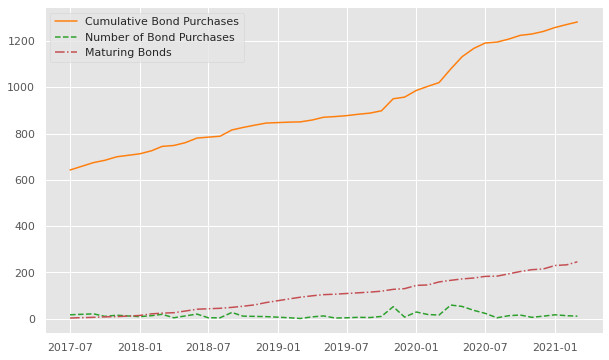

In [ ]:
# time series plot 
plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(purchasing.Date, purchasing.CuPurchases, color='tab:orange', label='Cumulative Bond Purchases')

ax.plot(purchasing.Date, purchasing.Purchases, color='tab:green', linestyle='--',
        label='Number of Bond Purchases')

ax.plot(purchasing.Date, purchasing.CuMaturing, color='r', linestyle='dashdot',
        label='Maturing Bonds')

ax.legend(loc='upper left')


#fig

The development of maturing bonds is rather steadily increasing. As observed before, the largest increase of bond purchases was the initialisation of the CSPP programm in July 2017 and from late 2019 to mid 2020, which maybe in relationship with the Pandemic Emergency Purchase Programme (PEPP), aiming to expand the range of eligible assets under the corporate sector purchase programme (CSPP).  

# Maps

We document how the purchases of corporate bonds by the ECB is distributed across Europe. Specifically, we construct a chloropleth map of Europe displaying total ECB holdings by country

In [ ]:
# create world geodataframe
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [ ]:
# create europe geodataframe
europe = world[world.continent == 'Europe']

In [ ]:
# remove french guiana from france in europe
shape = europe[europe['name'] == 'France']['geometry'].all()
fr_df = pd.Series(['France', 'France'], name = 'country')
fr_df = gpd.GeoDataFrame(fr_df, geometry = [shape[1], shape[2]])
fr_df = fr_df.dissolve(by = 'country')
europe.at[europe['name'] == 'France', 'geometry'] = fr_df['geometry'].values

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [ ]:
# remove russia from europe
europe = europe.drop(index = 18)

In [ ]:
# create new dataframe for map plots
map_df = df[['Country', 'EURO HOLDING', 'Emissions', 'Resource Use']]
map_df = map_df.set_index('Country')

# add calculated of total ecb holdings by country
map_df = map_df.join(map_df.groupby(map_df.index)['EURO HOLDING'].sum(), on = map_df.index, rsuffix = ' TOTAL BY COUNTRY')

# add calculated column of mean emissions, resource use score by country
map_df = map_df.join((map_df.groupby(map_df.index)['Emissions'].mean()), on = map_df.index, rsuffix = ' Mean By Country')
map_df = map_df.join((map_df.groupby(map_df.index)['Resource Use'].mean()), on = map_df.index, rsuffix = ' Mean By Country')

# add calculated column of number of ecb purchases by country
map_df = map_df.join(map_df.index.value_counts().rename('ECB Purchases Count By Country', axis = 1), on = map_df.index)

# keep only the first instance of each country
map_df = map_df[ ~ map_df.index.duplicated(keep = 'first')]

# add calculated column of mean emissions score weighted by ecb purchases by country
map_df['Emissions Mean By Country Weighted'] = map_df['Emissions Mean By Country']/map_df['ECB Purchases Count By Country']

In [ ]:
# join with geodataframe
map_df = europe.set_index('name').join(map_df)
map_df = map_df.drop(['pop_est', 'continent', 'iso_a3', 'gdp_md_est'], 1)

In [ ]:
# convert to geodataframe
map_df = gpd.GeoDataFrame(map_df)
map_df = map_df.to_crs('epsg:25832')

In [ ]:
def map_plot(variable, colors, text1, text2): 
    # create figure
    fig, ax = plt.subplots(1, figsize = (12, 8), dpi = 100)

    # add title and subtitle
    fig = plt.figtext(0.3, 0.98, text1, fontsize = 18, ha = 'left', fontweight = 3)
    fig = plt.figtext(0.3, 0.935, text2, fontsize = 14, ha = 'left')

    # add source text
    fig = plt.figtext(0.3, 0.1, 'SOURCE: European Central Bank.', fontsize = 8, ha = 'left',  va = 'bottom', color = 'lightgrey')

    # remove axis
    fig = ax.set_axis_off()

    # plot map with legend
    fig = map_df.plot(column = variable, cmap = colors, linewidth = 0.8, ax = ax, edgecolor = '0.8', legend = True)
    return fig 

**Map Plots to illustrate the Bond Purchases**

Purchase volume by country:

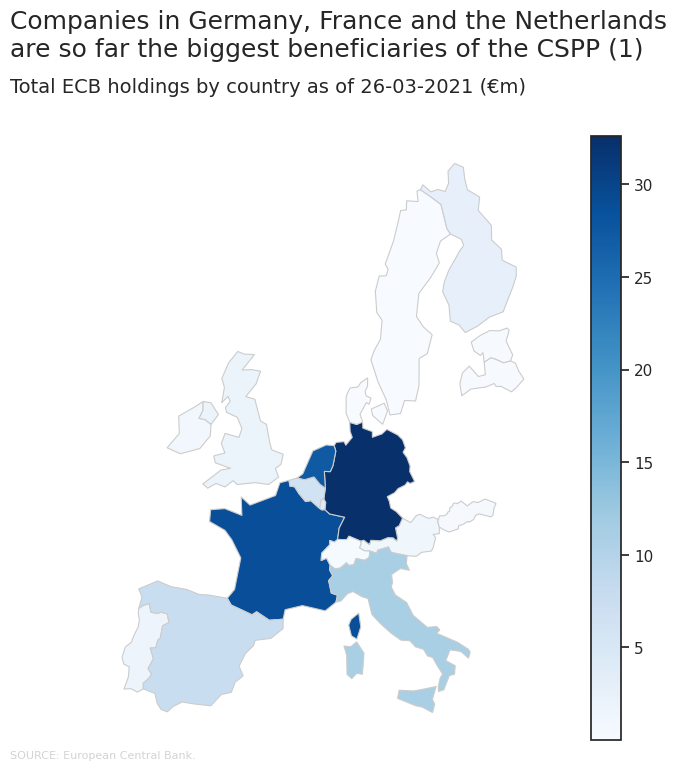

In [ ]:
map_plot('EURO HOLDING TOTAL BY COUNTRY', 'Blues', 
         'Companies in Germany, France and the Netherlands\nare so far the biggest beneficiaries of the CSPP (1)', 
         'Total ECB holdings by country as of 26-03-2021 (€m)')

Bond purchases of the highest volume were made for German, French and Dutch companies (>25 Mio), followed by Italian and Spanish companies (>10 Mio). 

Average emission score of companies by country

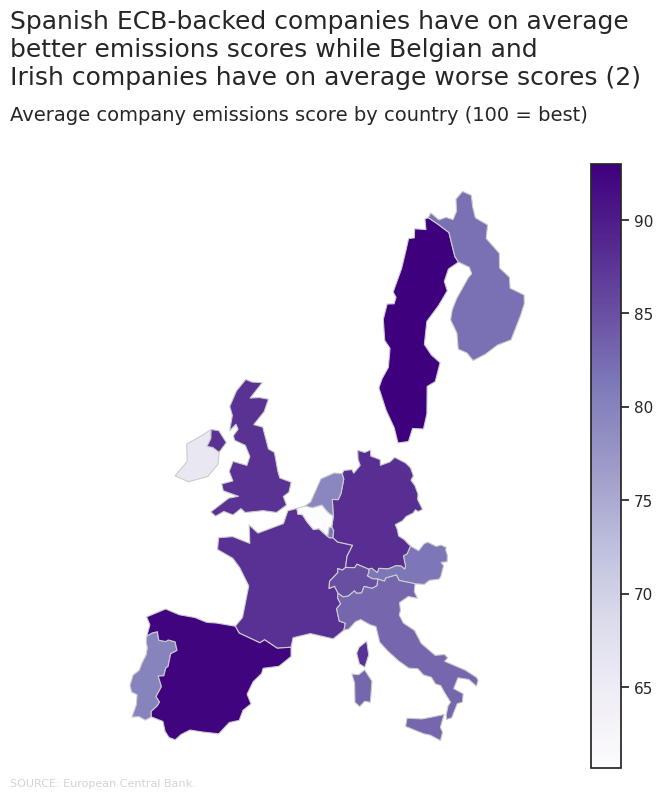

In [ ]:
map_plot('Emissions Mean By Country', 'Purples', 
         'Spanish ECB-backed companies have on average\nbetter emissions scores while Belgian and\nIrish companies have on average worse scores (2)', 
         'Average company emissions score by country (100 = best)')

Belgian and Irish companies on average have the lowest Emission Scores (<65). Spanish and Swedish companies have the highest scores (>90). In general, the average across all countries is rather high (>75), with Belgium and Ireland being negative outliers. 

Average Resource use score of companies by country

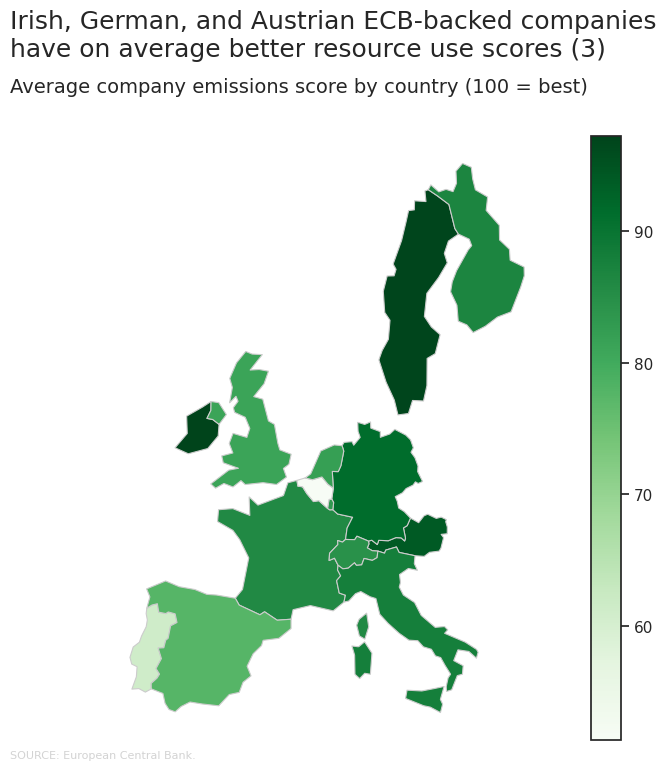

In [ ]:
map_plot('Resource Use Mean By Country', 'Greens', 
         'Irish, German, and Austrian ECB-backed companies\nhave on average better resource use scores (3)', 
         'Average company emissions score by country (100 = best)')

Belgium remains a negative outlier with an average resource use score below 60. Ireland Austria and Sweden not take the lead in resource averages (>90). Again we observe generally high resource use scores (>75), with the exception of Belgium and Portugal. 

Many companies from which the ECB buys bonds seem to have their headquarters in the Netherlands, Germany and France. These are three large economies, and it is thus conclusive that more European companies are headquartered in one of the three countries. Another possible explanation is tax optimisation. In order to pay less taxes, many European companies locate their headquarters in the Netherlands. This is in particular the case for many bond issuing companies. This could contribute to its prevalence on the above map.

# Clustering

In this section we attempt to use clustering analysis in order to discover further insights about the relationship of bond purchasing volume, ESG ratings and Sector GHG emissions. 

In [22]:
# preprocessing 
df_cluster = df.filter(items=['ISSUER', 'EURO HOLDING', 'Climate Watch', 'International Energy Agency',
                          'GHG_Total_CW', 'GHG_IEA_Share',
                          'Emissions', 'Resource Use', 'Innovation', 'Total Environment']) # filter for relevant columns
df_cluster = df_cluster.groupby(by=['ISSUER', 'Climate Watch', 'International Energy Agency',
                    'GHG_Total_CW', 'GHG_IEA_Share', 'Emissions', 'Resource Use',
                    'Innovation', 'Total Environment'], as_index=False).sum() # sum bond purchases per company 
df_cluster['EURO HOLDING'] = df_cluster['EURO HOLDING'].apply(lambda x: (x*100)) # rescale bond purchases from Mio EURO to 10k EURO


In [ ]:
df_cluster.head(4)

,ISSUER,Climate Watch,International Energy Agency,GHG_Total_CW,GHG_IEA_Share,Emissions,Resource Use,Innovation,Total Environment,EURO HOLDING
0,A2A S.p.A.,Electricity/Heat,Oil & Natural Gas,1108.45,3.9,95.0,91.0,91.0,93.0,82.969201
1,ACEA S.p.A.,Electricity/Heat,Oil & Natural Gas,1108.45,3.9,85.0,96.0,84.0,88.0,67.253028
2,EDP - Energias de Portugal SA,Electricity/Heat,Oil & Natural Gas,1108.45,3.9,80.0,59.0,97.0,78.0,3.984490
3,EDP Finance B.V.,Electricity/Heat,Oil & Natural Gas,1108.45,3.9,79.0,61.0,98.0,79.0,160.085683


**Clustering Pipeline**

In [ ]:
# Create training data by filtering again 
training = df_cluster.filter(items=['EURO HOLDING','GHG_IEA_Share', 'Total Environment']) 

In [ ]:
# Normalize Data in an array for the cluster algorithm
mms = MinMaxScaler()
mms.fit(training)
data_transformed = mms.transform(training)

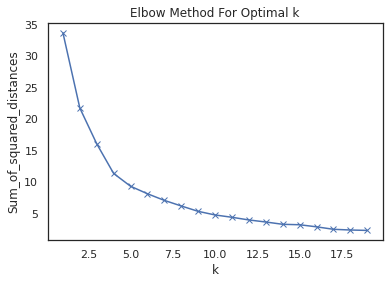

In [ ]:
# Select optimal number of clusters
inertia = []
# loop to collect intertia values
K = range(1,20)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans = kmeans.fit(data_transformed)
    inertia.append(kmeans.inertia_)

# Plot of Intertia values for different K
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Inertia calculates the sum of the distances of all the points within a cluster from the centroid of that cluster. This sum of intracluster distances, should be as small as possible. However, as it naturally decreases as the number of clusters increases, we are looking for an elbow in the curve. There is an elbow at 4 clusters, hence a solution which 4 clusters seems suitable.

Inertia is calculated as the sum of squared distance for each point to it's closest centroid:

$\sum_{j} d(i,cr)^{2}$

In [ ]:
# Train the clustering algorithm
kmeans = KMeans(n_clusters=4)
kmeans = kmeans.fit(data_transformed)
y_kmeans = kmeans.predict(data_transformed)

In [ ]:
# Prepare data for plot (Scale dataframe)
scaler = MinMaxScaler()
training[training.columns] = scaler.fit_transform(training[training.columns])

# Get centroids
centroids = kmeans.cluster_centers_
cen_x = [i[2] for i in centroids]
cen_y = [i[0] for i in centroids]

## add centroids and cluster to training df
training['cluster'] = y_kmeans
training['cen_x'] = training.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2], 3:cen_x[3]})
training['cen_y'] = training.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2], 3:cen_y[3]})

## define and map colors
colors = ['#2095DF','#81DF20','#DF2020','#FFDF78']
training['c'] = training.cluster.map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3]})

# Add column for scale points
training['GHG_IEA_Share_Scale'] = training['GHG_IEA_Share']*100

Given an initial set of k means m the k-means algorithm iteratively executes these two steps:

**Assignment step:** Each observation is assigned to the cluster with the closest mean in terms of least squared Euclidean distance:

$S_{i} = \{ d(x_{p}, m_{i})^{2} \leq d(x_{p}, m_{j})^{2} \forall j, 1\leq j \leq k \}$

**Update step:** Means (centroids) are recalculated for observations assigned to each cluster:

$m_{i} = \frac{1}{|S_{i}|} \sum_{x_{j} \in S_{j}} x_{j}$

The algorithm has converged when the assignments no longer change.

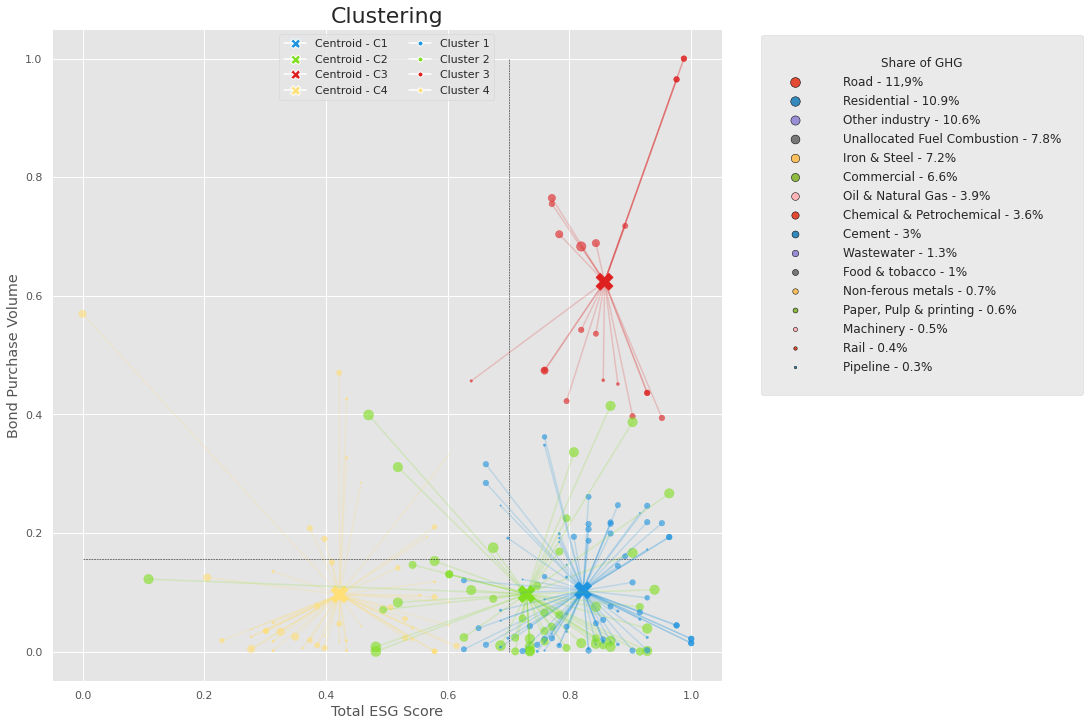

In [ ]:
#### cluster plot 

#plt.style.use('classic')
fig, ax = plt.subplots(1, figsize=(12,12))
# Plot ESG scores and Bond holdings with GHG emission shares 
sc = plt.scatter(training['Total Environment'],training['EURO HOLDING'],s=training['GHG_IEA_Share_Scale'],c=training.c,alpha=0.6)
# Plot Cluster Centroids
plt.scatter(cen_x, cen_y, marker='X', c=colors, s=300)
# plot mean esg scores
plt.plot([training['Total Environment'].mean()]*2, [0,1], color='black', lw=0.5, linestyle='--')
# plot mean holdings
plt.plot([0,1], [training['EURO HOLDING'].mean()]*2, color='black', lw=0.5, linestyle='--')
# plot lines
for idx, val in training.iterrows():
    x = [val['Total Environment'], val.cen_x,]
    y = [val['EURO HOLDING'], val.cen_y]
    plt.plot(x, y, c=val.c, alpha=0.2)
# title and labels
plt.title('Clustering',fontsize=22)
plt.xlabel('Total ESG Score')
plt.ylabel('Bond Purchase Volume')

# legend
legend_elements = [Line2D([0], [0], marker='X', color='w', label='Centroid - C{}'.format(i+1), 
            markerfacecolor=mcolor, markersize=10) for i, mcolor in enumerate(colors)]
legend_elements.extend([Line2D([0], [0], marker='o', color='w', label='Cluster {}'.format(i+1), 
                   markerfacecolor=mcolor, markersize=5) for i, mcolor in enumerate(colors)])

size_list = []
for i in range(96,5,-6):
    p = plt.scatter([],[], s=i, edgecolors='black')
    size_list.append(p)
    
labels = ["Road - 11,9%", "Residential - 10.9%", "Other industry - 10.6%", "Unallocated Fuel Combustion - 7.8%", "Iron & Steel - 7.2%", "Commercial - 6.6%",
          "Oil & Natural Gas - 3.9%", "Chemical & Petrochemical - 3.6%", "Cement - 3%", "Wastewater - 1.3%", "Food & tobacco - 1%", "Non-ferous metals - 0.7%",
         "Paper, Pulp & printing - 0.6%", "Machinery - 0.5%", "Rail - 0.4%", "Pipeline - 0.3%"]

fontP = FontProperties()
fontP.set_size('medium')
legend2 = plt.legend(size_list, labels, fontsize=20, borderpad = 1.8,
    handletextpad=3, title='Share of GHG', scatterpoints = 1, bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)

lengend1 = plt.legend(handles=legend_elements, loc='upper center', ncol=2)
ax.add_artist(legend2)

plt.show()

The solution finds four clusters for companies with distinct purchase volume, ESG scores and share of GHG emissions by sector. The red cluster consists of companies of which bonds are purchased in high volumia by the ECB. Their ESG are with exception of one outlier above average. Their pattern of GHG emission shares is inconclusive. The blue, green and yellow cluster consist of companies with similar volume of purchased bonds. The blue clusters consists of the firms with the highest ESG scores among them, that at the same time are all companies of sectors with low shares of GHG emissions. THe ESG scores in the green cluster are more spread out in particular towards lower ESG scores and it consits of firms within GHG intensive sectors. The yellow cluster has some outliers with high purchase volume and the companies are characterized by lower than average ESG scores, while being within the low intensity GHG sectors. 

Overall the clustering results give some evidence for the ECB supporting the Green Economy with their bond purchases, as the companies with the highest puchase volume are associated with above average ESG scores. These companies however, are not systematically selected from low GHG intense sectors. Ideally, the ECB would increase their purchase volume for firms within the blue cluster that have both low ESG scores and are within less carbon intensive sectors. This further illustrates the ambivalence of ESG ratings, as they are heavily influenced by factors other than the pure emission intensity of a company, but also innovation, resource use, investments etc. 

# Time Series Analysis

In this section, we attempt to answer the question of whether there is an actual trend from the ECB to invest in more environmentaly-friendly (or "greener") companies.
We use as main indicators the ESG Score of each company, and the total GHG Emissions per company. The goal is to perform a basic time series analysis, in order to assess whether the indicators are stationary - that is, they are a stochastic process with constant mean and variance, and uncorrelated lagged errors.<br>
In a nutshell, if we do not find stationarity, then statistically there seems to be a trend. 
<br>
Some caveats:
- Since the ECB does not report holdings invested per company (or per sector), but rather the total invested per month, we assume equal investment into each company <br>
- This is a very strong assumptiom, - mainly due to the quality of the data from the ECB -, and it is taken into account that more representative results could be achieved with a more thorough reporting of the data from the institution <br>
- Due to the forementioned, we do not treat missing values by replacing them, but instead drop them from the computation of the mean scores and emissions <br>

In [ ]:
# Preprocessing
# converting date to date format with the last day of the month
df['MONTH_YEAR'] = pd.to_datetime(df['MONTH_YEAR'], format="%Y-%m")
df['MONTH_YEAR'] = df['MONTH_YEAR'].dt.to_period('M').apply(lambda r: r.end_time)
df['MONTH_YEAR'] = df['MONTH_YEAR'].dt.date

In [ ]:
# Create the actual time series
hold_t = df.groupby(['MONTH_YEAR']).count().drop(columns=['Input_Country', 'Country', 'GHG_Total_CW', \
       'GHG_IEA_Share', 'Emissions', 'Resource Use', 'Innovation', \
       'Total Environment','Climate Watch'])
hold_t['Total Holdings'] = df.groupby(['MONTH_YEAR']).mean()['HOLDINGS']
hold_t = hold_t.drop(columns=['HOLDINGS'])
hold_t['Mean ESG Score'] = df[['MONTH_YEAR','Total Environment']].groupby(['MONTH_YEAR']).mean()['Total Environment']
hold_t['Mean GHG Emissions'] = df[['MONTH_YEAR','GHG_Total_CW']].groupby(['MONTH_YEAR']).mean()['GHG_Total_CW']
hold_t = hold_t.reset_index()
hold_t = hold_t.rename(columns={"MONTH_YEAR": "date", "ISSUER": 'Number of companies'})
hold_t = hold_t.set_index('date')
#del(df)

In [ ]:
# First 5 rows: 
pd.set_option('display.max_columns', 10)
print(hold_t.head())

             NCB  Date  ISIN  Number of companies  MATURITY DATE  ...  Year  \
date                                                              ...         
2017-06-30  1435  1435  1435                 1435           1435  ...  1435   
2017-07-31  2921  2921  2921                 2921           2921  ...  2921   
2017-08-31  2960  2960  2960                 2960           2960  ...  2960   
2017-09-30  3745  3745  3745                 3745           3745  ...  3745   
2017-10-31  3040  3040  3040                 3040           3040  ...  3040   

            Month  Total Holdings  Mean ESG Score  Mean GHG Emissions  
date                                                                   
2017-06-30   1435           6.790       79.226351          709.081875  
2017-07-31   2921           5.606       79.504576          709.430548  
2017-08-31   2960           4.672       79.343443          707.072426  
2017-09-30   3745           7.760       79.427830          708.638665  
2017-10-31   3

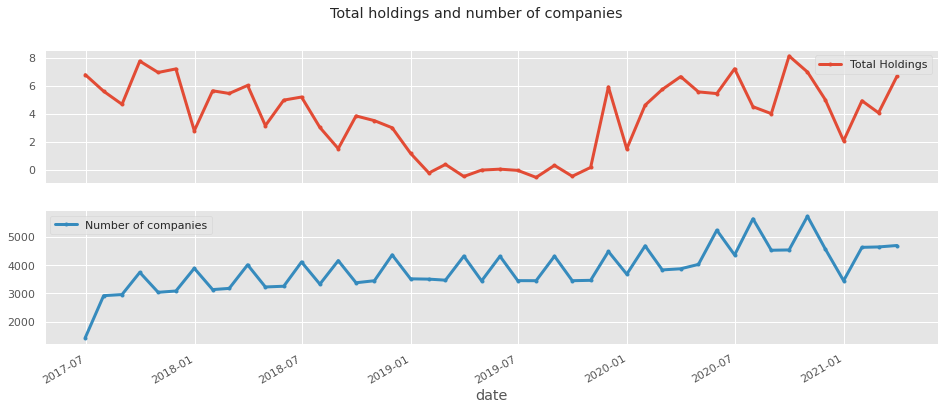

In [ ]:
# Plot time series
cols_plot = ['Total Holdings', 'Number of companies', 'Mean ESG Score', 'Mean GHG Emissions'];
hold_t[cols_plot[:2]].plot(marker='.', alpha=3, figsize=(16, 6), linewidth=3, subplots=True, \
                            title='Total holdings and number of companies');

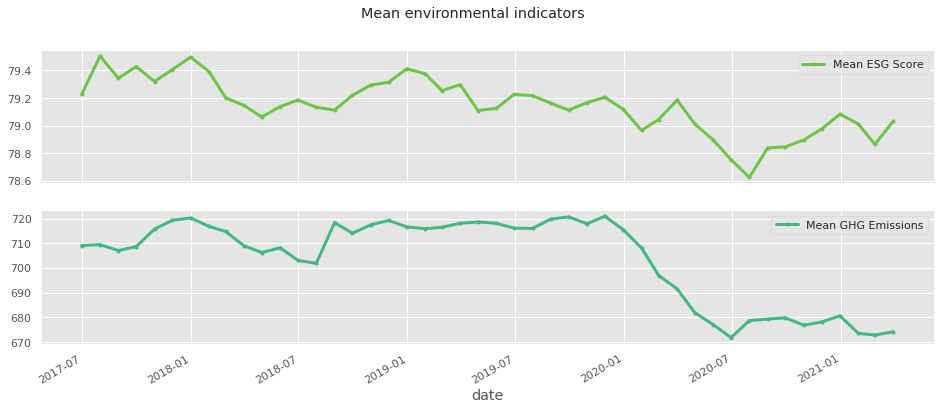

In [ ]:
hold_t[cols_plot[2:]].plot(marker='.', alpha=2, figsize=(16, 6), linewidth=3, subplots=True, \
                            title='Mean environmental indicators', color = ['#6cc644','#41b883']);

Let us now perform a unit root test over the indicators:

In [ ]:
# unit root test
print('Unit root test (ADF) with a constant:')
for X in cols_plot [2:]:
    result = adfuller(hold_t[X], regression = 'c')
    print(X)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('')
print('')
print('')
print('ADF test for deterministic trend:')
for X in cols_plot [2:]:
    result = adfuller(hold_t[X], regression = 'ct')
    print(X)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('')

Unit root test (ADF) with a constant:
Mean ESG Score
ADF Statistic: -1.944323
p-value: 0.311506

Mean GHG Emissions
ADF Statistic: -0.113841
p-value: 0.948042



ADF test for deterministic trend:
Mean ESG Score
ADF Statistic: -3.332664
p-value: 0.061056

Mean GHG Emissions
ADF Statistic: -1.481947
p-value: 0.835232



As seen, neither the mean ESG Score nor the mean GHG emissions per company are stationary - GHG is just barely not stationary when we consider a p-value of 5% $($p-value $=0.947683$, barely under $0.95$$)$. 



We must then work in differences.

Unit root in differences (ADF):
Mean ESG Score
ADF Statistic: -5.275651
p-value: 0.000006

Mean GHG Emissions
ADF Statistic: -5.463409
p-value: 0.000002



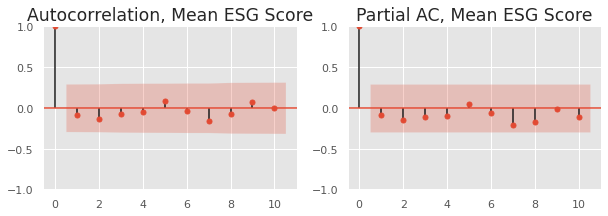

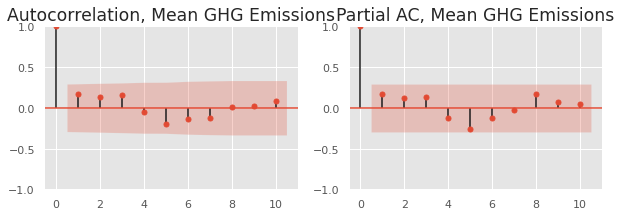

In [ ]:
# Unit root in differences (ADF)
hold_t_diff = hold_t.diff(periods=1, axis=0).dropna()
print('Unit root in differences (ADF):')
for X in cols_plot[2:]:
    result = adfuller(hold_t_diff[X], regression='c')
    print(X)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('')

for X in cols_plot[2:]:
    fig, ax = plt.subplots(1,2,figsize=(10,3))
    plot_acf(hold_t_diff[X], lags = 10, title='Autocorrelation, '+X, ax=ax[0])
    plot_pacf(hold_t_diff[X], lags = 10, title='Partial AC, '+X, ax=ax[1])
    plt.show()

Ljung-Box test for white noise of residuals:
     lb_stat  lb_pvalue
1   0.087508        NaN
2   0.393236   0.530603
3   1.422724   0.490975
4   1.551871   0.670351
5   3.243338   0.517960
6   3.626623   0.604320
7   4.247484   0.643224
8   4.301754   0.744439
9   4.307379   0.828381
10  4.650926   0.863615


/Users/sophielangbein/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/Users/sophielangbein/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


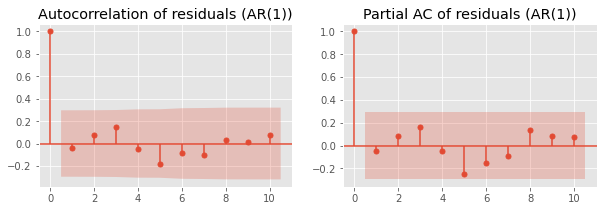

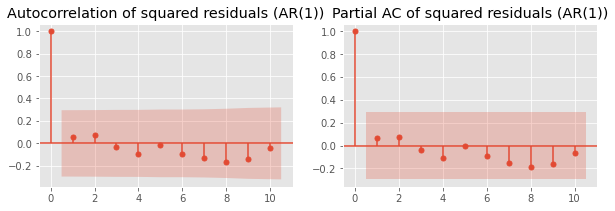

In [ ]:
# AR(1) model building for GHG Emissions
fit_ar = sm.tsa.AutoReg(hold_t_diff[cols_plot[3]], lags = 1, trend = 'n').fit();

# test if white noise
print('Ljung-Box test for white noise of residuals:')
print(acorr_ljungbox(fit_ar.resid, model_df=1, lags=10, return_df=True));

# test if there are AC and PAC, and whether an ARMA-GARCH model is needed
fig, ax = plt.subplots(1,2,figsize=(10,3))
plot_acf(fit_ar.resid, lags = 10, title='Autocorrelation of residuals (AR(1))', ax=ax[0]);
plot_pacf(fit_ar.resid, lags = 10, title='Partial AC of residuals (AR(1))', ax=ax[1]);
plt.show()

fig, ax = plt.subplots(1,2,figsize=(10,3))
plot_acf(fit_ar.resid**2, lags = 10, title='Autocorrelation of squared residuals (AR(1))', ax=ax[0]);
plot_pacf(fit_ar.resid**2, lags = 10, title='Partial AC of squared residuals (AR(1))', ax=ax[1]);
plt.show()

In [ ]:
print(stats.mean(hold_t_diff[cols_plot[2]]))
print(fit_ar.params[0])

-0.004286143500482669
0.1913363177313508


Estimated equations for monthly difference of averages in ESG scores and GHG emissions: \


* $∆\overline{ESG}_{t} = 0.0319 + ε_t$
* $∆\overline{GHG_{t}} = -0.3518$ $\overline{GHG}_{t−1} + ε_t$ \


Time series conclusions:

- The average ESG score of companies the ECB invests in is stationary in first level differences (with no deterministic trend), which supports a slight tendency from the institution in investing into companies with higher transparency and management in environmental, social and governance risks over time
- Regarding average green house gas (GHG) emissions, there has been a very weak tendency from the bank to invest in companies with less emissions - the AR(1) model seems to be appropriate, and hints towards a convergence in this average
- However, given the relatively small coefficient for the AR(1) model (considering an average GHG emission per company of 707.56 for March 2021), plus the "almost stationarity" suggested by the p-value of 0.9477, findings suggest that this pattern is not clear-cut

Overall - with all caveats considered -, the ECB has displayed a slight tendency towards investing in companies with higher responsibility with their stakeholders; however, whether this translate to "greener" investments is not apparent from the data. In our opinion, the presented evidence is considered inconclusive

### Time Series Forecast

In [ ]:
#Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 3)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

mean_esg_ts = mean_esg_ts[['Mean ESG Score']]

warnings.filterwarnings("ignore") # specify to ignore warning messages

aic= []
parameters = []


for param in pdq:
    #for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(mean_esg_ts,
                                            order=param,
                                            #seasonal_order=param_seasonal,
                                            enforce_stationarity=True,
                                            enforce_invertibility=True)

            results = mod.fit()
            # save results in lists
            aic.append(results.aic)
            parameters.append(param)
            #seasonal_param.append(param_seasonal)

            #print('ARIMA{} - AIC:{}'.format(param, results.aic))
        except:
            continue
            
# find lowest aic            
index_min = min(range(len(aic)), key=aic.__getitem__)  
print('The optimal model is: ARIMA{} - AIC:{}'.format(parameters[index_min], aic[index_min]))
model = ARIMA(mean_esg_ts, order=parameters[index_min])
model_fit = model.fit()

forecast = pd.DataFrame(model_fit.predict(start=5, end=len(mean_esg_ts)+5))
#add dates to predicted values
forecast['date'] = pd.date_range(start ='2017-09-30', 
         end ='2021-08-31', freq ='MS')


The optimal model is: ARIMA(0, 1, 0) - AIC:-67.29996980144738


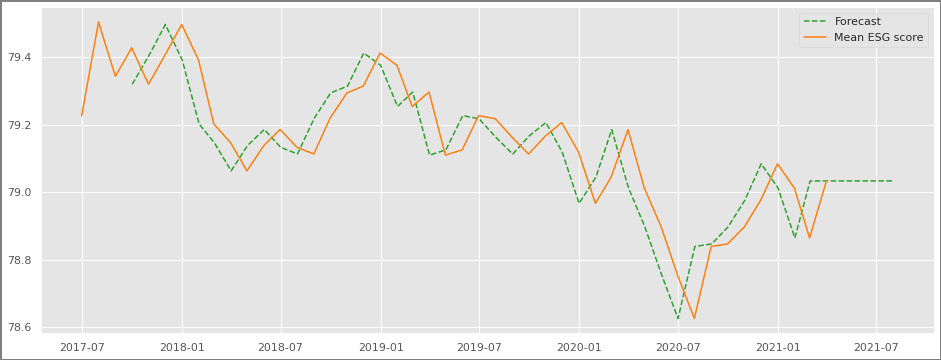

In [ ]:
mean_esg_ts_dates = hold_t.reset_index()
mean_esg_ts_dates = mean_esg_ts_dates[['date','Mean ESG Score']]

fig, ax = plt.subplots(figsize=(16, 6), linewidth = 3 )

ax.plot(forecast.date, forecast.predicted_mean ,color='tab:green', linestyle='--', label='Forecast')

ax.plot(mean_esg_ts_dates.date, mean_esg_ts_dates['Mean ESG Score'], color='tab:orange',  label='Mean ESG score')

ax.legend(loc='upper right')

# Network Analysis

In [8]:
# Clean Data
network_data = issues.loc[:, ~issues.columns.str.contains('^Unnamed')] # Drop unnamed columns
network_data = network_data[['ISSUER','Country','Input_Country']]
network_data = network_data.groupby('ISSUER').first().reset_index()
network_data['Input_Country']=network_data['Input_Country'].replace({'IT': 'Italy', 'DE': 'Germany', 'FI': 'Finland', 'ES': 'Spain','BE':'Belgium','FR':'France'})
network_data['Country']=network_data['Country'].str.strip()

network_data.shape

(235, 3)

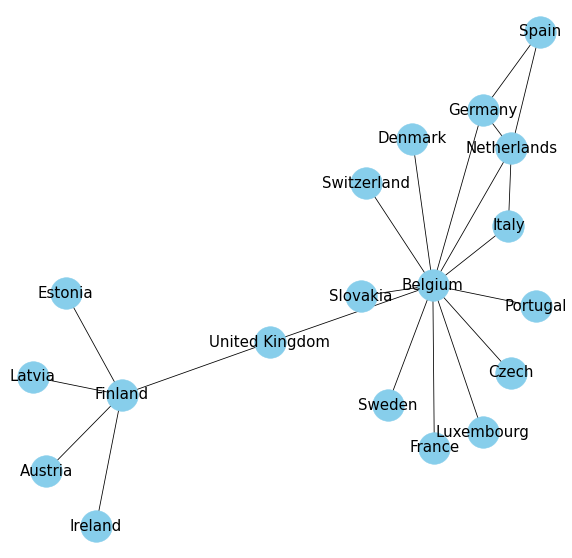

In [9]:
edges = network_data[['Input_Country', 'Country']].values
g = nx.from_edgelist(edges)
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
nx.draw_networkx(g, ax=ax, node_size=1000,
                 font_size=15, alpha=1,
                 width=.8,node_color='skyblue')
ax.set_axis_off()


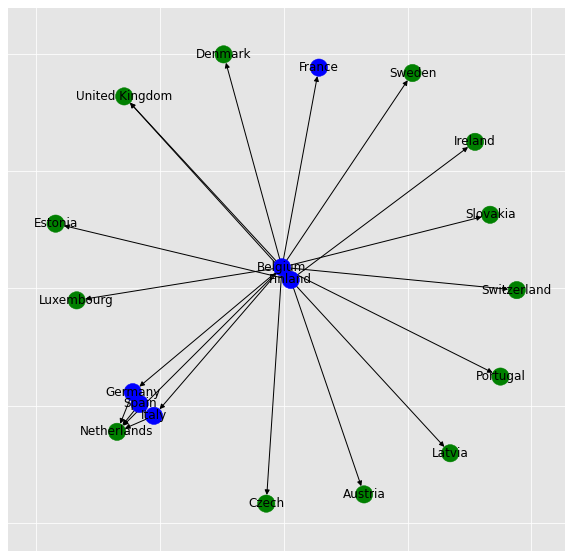

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

G = nx.DiGraph()
source_nodes = set([edge[0] for edge in edges])
G.add_edges_from(edges)
for n in G.nodes():
    G.nodes[n]['color'] = 'b' if n in source_nodes else 'g'

pos = nx.spring_layout(G)
colors = [node[1]['color'] for node in G.nodes(data=True)]
nx.draw_networkx(G, pos, with_labels=True, node_color=colors)
plt.show()

A social network graph illustrating the green bond purchasing connections among countries in Europe. 

# Which Sectors and Purchasing countries are most Green?

In [23]:
green_sectors = df_cluster[['Climate Watch','Total Environment']]
green_sectors = green_sectors.loc[~(green_sectors['Climate Watch']=='Other Fuel Combustion')]

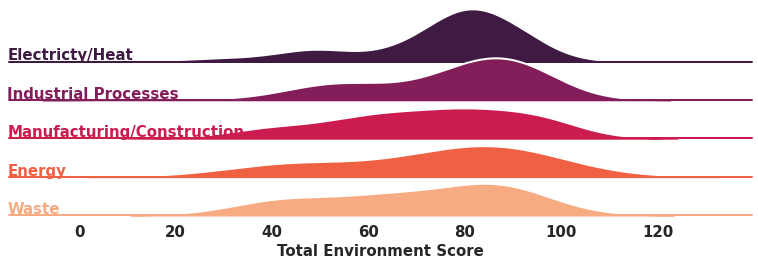

In [24]:
# we generate a color palette with Seaborn.color_palette()
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

climate_dict = {1: 'Electricty/Heat',
              2: 'Industrial Processes',
              3: 'Manufacturing/Construction',
              4: 'Energy',
              5: 'Waste'}



pal = sns.color_palette(palette='rocket', n_colors=5)

# in the sns.FacetGrid class, the 'hue' argument is the one that is the one that will be represented by colors with 'palette'
g = sns.FacetGrid(green_sectors, row='Climate Watch', hue='Climate Watch', aspect=15, height=0.75, palette=pal)

# then we add the densities kdeplots for each month
g.map(sns.kdeplot, 'Total Environment',
      bw_adjust=1, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)

# here we add a white line that represents the contour of each kdeplot
g.map(sns.kdeplot, 'Total Environment', 
      bw_adjust=1, clip_on=False, 
      color="w", lw=2)

# here we add a horizontal line for each plot
g.map(plt.axhline, y=0,
      lw=2, clip_on=False)

# we loop over the FacetGrid figure axes (g.axes.flat) and add the month as text with the right color
# notice how ax.lines[-1].get_color() enables you to access the last line's color in each matplotlib.Axes
for i, ax in enumerate(g.axes.flat):
    ax.text(-15, 0.001, climate_dict[i+1],
            fontweight='bold', fontsize=15,
            color=ax.lines[-1].get_color())
    
# we use matplotlib.Figure.subplots_adjust() function to get the subplots to overlap
g.fig.subplots_adjust(hspace=-0.3)

# eventually we remove axes titles, yticks and spines
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)

plt.setp(ax.get_xticklabels(), fontsize=15, fontweight='bold')
plt.xlabel('Total Environment Score', fontweight='bold', fontsize=15)
#g.fig.suptitle('Daily average temperature in Seattle per month',
 #              ha='right',
 #              fontsize=20,
 #              fontweight=20)

plt.show()

In [25]:
# Preprocessing 
green_countries = df.filter(items=['ISSUER', 'EURO HOLDING', 'Climate Watch', 'International Energy Agency',
                          'GHG_Total_CW', 'GHG_IEA_Share',
                          'Emissions', 'Resource Use', 'Innovation', 'Total Environment','Input_Country']) # filter for relevant columns
green_countries = green_countries.groupby(by=['ISSUER', 'Climate Watch', 'International Energy Agency',
                    'GHG_Total_CW', 'GHG_IEA_Share', 'Emissions', 'Resource Use','Input_Country',
                    'Innovation', 'Total Environment'], as_index=False).sum() 
green_countries = green_countries[['Input_Country','Total Environment']]
green_countries['Input_Country']=green_countries['Input_Country'].replace({'IT': 'Italy', 'DE': 'Germany', 'FI': 'Finland', 'ES': 'Spain','BE':'Belgium','FR':'France'})

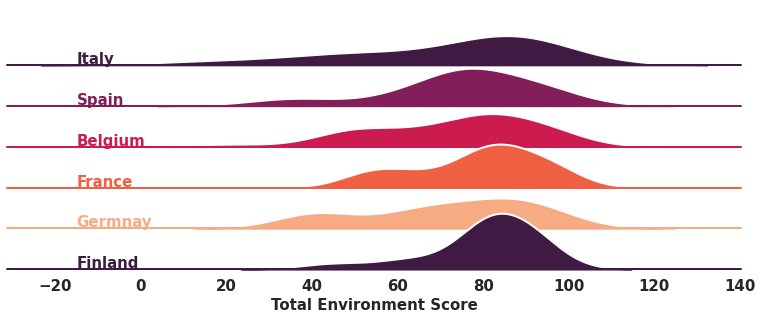

In [26]:
# we generate a color palette with Seaborn.color_palette()
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

climate_dict = {1: 'Italy',
              2: 'Spain',
              3: 'Belgium',
              4: 'France',
              5: 'Germnay',
              6: 'Finland'}


pal = sns.color_palette(palette='rocket', n_colors=5)

# in the sns.FacetGrid class, the 'hue' argument is the one that is the one that will be represented by colors with 'palette'
g = sns.FacetGrid(green_countries, row='Input_Country', hue='Input_Country', aspect=15, height=0.75, palette=pal)

# then we add the densities kdeplots for each month
g.map(sns.kdeplot, 'Total Environment',
      bw_adjust=1, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)

# here we add a white line that represents the contour of each kdeplot
g.map(sns.kdeplot, 'Total Environment', 
      bw_adjust=1, clip_on=False, 
      color="w", lw=2)

# here we add a horizontal line for each plot
g.map(plt.axhline, y=0,
      lw=2, clip_on=False)

# we loop over the FacetGrid figure axes (g.axes.flat) and add the month as text with the right color
# notice how ax.lines[-1].get_color() enables you to access the last line's color in each matplotlib.Axes
for i, ax in enumerate(g.axes.flat):
    ax.text(-15, 0.001, climate_dict[i+1],
            fontweight='bold', fontsize=15,
            color=ax.lines[-1].get_color())
    
# we use matplotlib.Figure.subplots_adjust() function to get the subplots to overlap
g.fig.subplots_adjust(hspace=-0.3)

# eventually we remove axes titles, yticks and spines
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)

plt.setp(ax.get_xticklabels(), fontsize=15, fontweight='bold')
plt.xlabel('Total Environment Score', fontweight='bold', fontsize=15)
#g.fig.suptitle('title',
 #              ha='right',
 #              fontsize=20,
 #              fontweight=20)

plt.show()